In [61]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pickle
import os

from RMALoaders import *

In [62]:
# def get_proj_metric_value(path,target_area,source_area,experiment):
#     filename = 'area_id_'+str(source_area)+'exp_id_'+str(experiment)+'.csv'
#     data_df = pd.read_csv(path / filename)
#     return data_df[(data_df['hemisphere_id']==1) & (data_df['structure_id']==target_area)]['projection_energy'].item()

In [63]:
target_area_name = 'VISpm'
target_area_object = RMAStructure(acronym=target_area_name)
target_area_id = target_area_object.id
target_area_id

533

In [64]:
path = Path.home() / 'Desktop' / 'data' / 'connectivity'
filename = path / 'filtered_area_experiment_id_dict_2_hem_1_VISpm_vol.pkl'
with open(filename, 'rb') as f: meta_data_dict = pickle.load(f)

In [65]:
len(meta_data_dict.keys())

316

In [66]:
path = Path.home() / 'Desktop' / 'data' / 'connectivity' / 'centroids_normalized_projection_volume_hem_id_1_inj_vol_thresh_0.7_VISpm'
filename = path / 'ipsilateral_centroids_dict_hem_1_inj_vol_thresh_0.7_VISpm.pkl'
with open(filename, 'rb') as f: data_dict = pickle.load(f)

In [67]:
len(data_dict.keys())

90

In [68]:
filtered_out = []
for a in meta_data_dict.keys():
    if a not in data_dict.keys(): 
        # print(a)
        filtered_out.append(a)
print(len(filtered_out))
print(filtered_out)

226
[223, 266, 914, 207, 1049, 609, 35, 1009, 38, 1105, 59, 390, 591, 262, 872, 1061, 287, 30, 564, 604, 238, 619, 689, 88, 880, 614, 422, 255, 576073699, 549009223, 333, 27, 131, 483, 583, 23, 706, 677, 1037, 133, 484682470, 966, 1025, 151, 763, 280, 369, 830, 765, 231, 356, 839, 549009215, 206, 612, 169, 898, 757, 66, 968, 484682508, 182305689, 621, 210, 177, 374, 589508451, 639, 263, 982, 178, 534, 136, 75, 607344830, 106, 975, 222, 970, 1027, 347, 1031, 1077, 773, 15, 12, 574, 549009219, 10671, 581, 127, 1113, 589508447, 7, 100, 470, 181, 203, 149, 162, 350, 358, 1041, 998, 96, 72, 235, 576073704, 398, 560581559, 1018, 246, 599626927, 147, 118, 549009227, 576, 1044, 115, 629, 318, 298, 566, 58, 312782574, 271, 922, 1039, 491, 272, 63, 741, 135, 1109, 126, 515, 907, 173, 718, 725, 295, 146, 230, 414, 616, 606826663, 580, 1029, 563807435, 460, 445, 310, 560581563, 693, 642, 423, 749, 951, 292, 226, 653, 531, 599, 475, 225, 1052, 1098, 364, 197, 563807439, 19, 286, 957, 859, 814, 523,

In [69]:
# these areas are filtered out during calculation of weighted centroids in ipsilateral/contralateral sides because their len(coordinates)==0
# coordinates = [[exp[exp['hemisphere_id']==HEMISPHERE_TO_FILTER]['max_voxel_x'].item(), exp[exp['hemisphere_id']==HEMISPHERE_TO_FILTER]['max_voxel_y'].item(), exp[exp['hemisphere_id']==HEMISPHERE_TO_FILTER]['max_voxel_z'].item(), exp[exp['hemisphere_id']==HEMISPHERE_TO_FILTER][projection_metric].item()] for exp in ipsilateral_dict[area].values()]

# checking the unionized data manually
print(meta_data_dict[223])

[171482142, 286726777, 241278553, 232311236, 181891892, 286318327, 146660999, 298105299]


In [70]:
filename = f'area_id_{223}exp_id_'+str(171482142)+'.csv'
temp_data = pd.read_csv(Path.home() / 'Desktop' / 'data' / 'connectivity' / 'unionized_data_from_hem_1_VISpm_projecting_experiments' / filename)
temp_data.head()

,Unnamed: 0,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,section_data_set_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,0,1,629925199,False,0.000000,0,0,0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,171482142,143,2.582928e+08,9.846000e+06,0.000000e+00,0.000000,0.012061
1,1,3,629925907,False,0.322724,9570,1830,7290,0.052720,2.914463e-04,0.080940,277.717407,1.160741e-04,171482142,834,1.620523e+10,3.251178e+08,2.631494e+07,94754.361328,0.398269
2,2,1,629923961,False,0.031083,7550,2690,4610,0.000237,4.541380e-07,0.000135,297.655899,5.207456e-07,171482142,1100,2.913848e+10,9.360558e+08,1.265331e+05,425.098480,1.146668
3,3,1,629924288,False,0.189408,8820,770,5450,0.039577,3.636223e-05,0.010444,287.207923,8.713754e-05,171482142,886,1.145220e+11,1.956225e+09,2.042987e+07,71132.685526,2.396375
4,4,1,629924916,False,0.335822,8610,6470,1600,0.203540,5.787284e-04,0.171521,296.375458,4.481401e-04,171482142,566,8.338566e+10,6.321249e+08,1.084226e+08,365828.687500,0.774353


In [80]:
def get_df(area,exp):
    filename = f'area_id_{area}exp_id_'+str(exp)+'.csv'
    return pd.read_csv(Path.home() / 'Desktop' / 'data' / 'connectivity' / 'unionized_data_from_hem_1_VISpm_projecting_experiments' / filename)

In [88]:
# checking why area 223 was filtered out in centroids calculation loop
HEMISPHERE_TO_FILTER = 1
missing_area = 425
coordinates = []
for exp in meta_data_dict[missing_area]:
    edf = get_df(missing_area,exp)
    edf = edf[edf['structure_id']==target_area_id]
    coordinates.append([edf[edf['hemisphere_id']==HEMISPHERE_TO_FILTER]['max_voxel_x'].item(), edf[edf['hemisphere_id']==HEMISPHERE_TO_FILTER]['max_voxel_y'].item(), edf[edf['hemisphere_id']==HEMISPHERE_TO_FILTER]['max_voxel_z'].item(), edf[edf['hemisphere_id']==HEMISPHERE_TO_FILTER][projection_metric].item()])
coordinates

[[8860, 380, 4330, 74.3925409052609],
 [8400, 540, 4210, 34.3892734144254],
 [8900, 390, 4310, 9.4033566420124],
 [8400, 350, 4190, 16.347809748976],
 [8390, 360, 4210, 0.241927406467233],
 [8110, 480, 3490, 1.66879267261235],
 [8450, 420, 4290, 0.45874831468067],
 [8380, 1080, 4120, 0.761513895200963],
 [8070, 450, 3700, 0.13765248388556],
 [8810, 330, 4080, 0.0063527976733433],
 [9550, 580, 4340, 0.0079557088869525]]

In [72]:
data_arr = np.array(list(data_dict.values()))

In [73]:
data_arr[:,3]

array([4.32607678e-02, 9.99917943e-02, 1.89509241e-01, 1.12073012e-01,
       3.77172140e-04, 5.84676832e-04, 4.12903620e-03, 1.24669889e-04,
       3.22907208e-03, 5.20299615e-05, 8.05453516e-01, 6.63402735e-03,
       9.53821044e-04, 5.73403095e-04, 9.89055144e-06, 1.78022206e-02,
       1.97104404e-01, 2.45615084e-01, 6.47390069e-02, 9.42614628e-04,
       1.30805765e-03, 1.17795003e-03, 1.17636689e-05, 4.38742933e-05,
       1.75589512e-03, 6.62655624e-06, 4.79337006e-03, 3.40578011e-04,
       3.88736766e-04, 5.67798410e-01, 3.06903074e-05, 1.24608183e-01,
       6.81424303e-02, 2.81296962e-05, 1.68701163e-03, 1.67584941e-05,
       3.48513431e-05, 4.13540359e-01, 1.12767575e-03, 3.78437909e-04,
       6.05158739e-02, 2.02557624e-03, 2.16138951e-03, 3.41295740e-06,
       1.29191837e-02, 2.94515110e-01, 1.04897600e+00, 7.22553602e-03,
       3.47744071e-01, 5.80335046e-03, 9.68764325e-02, 1.39300064e-02,
       8.73133803e-03, 1.05645890e+00, 1.49180610e-04, 2.13505724e-03,
      

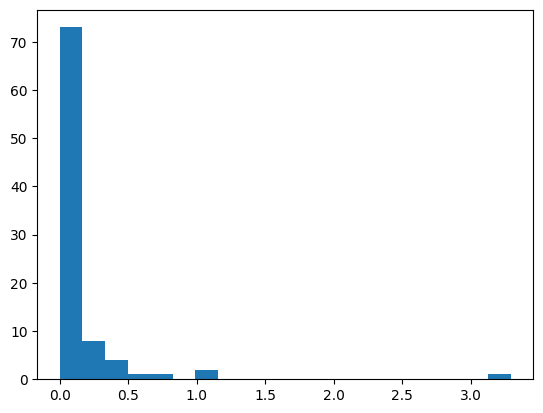

In [78]:
plt.hist(data_arr[:,3],bins=20)
plt.show()

In [75]:
# check distributions in specific areas

In [76]:
areas_to_check = ['CA3','TEa','ENTm','ENTl','DG','SCs','SCm']
for area in areas_to_check:
    print(area,RMAStructure(acronym=area).id)

CA3 463
TEa 541
ENTm 926
ENTl 918
DG 726
SCs 5744
SCm 16680


In [77]:
# impletement volume thresholding - get the value of injection/target volume from unionized data - filter out low volume experiments